In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:/Users/Jacqy/Documents/AB/smart.csv')
df.head()

,User ID,Group,Payment Plan,Conversion,Time Spent (s),Device,Date,Region
0,1,A,Plan A,0,79,Mobile,2024-10-02,Nakuru
1,2,B,Plan B,1,109,Mobile,2024-10-02,Eldoret
2,3,B,Plan B,0,106,Desktop,2024-10-02,Nairobi
3,4,A,Plan A,0,14,Desktop,2024-10-02,Nakuru
4,5,B,Plan B,1,26,Mobile,2024-10-02,Nakuru


In [10]:
df.isnull().sum()

User ID           0
Group             0
Payment Plan      0
Conversion        0
Time Spent (s)    0
Device            0
Date              0
Region            0
dtype: int64

In [11]:
df.head(100)

,User ID,Group,Payment Plan,Conversion,Time Spent (s),Device,Date,Region
0,1,A,Plan A,0,79,Mobile,2024-10-02,Nakuru
1,2,B,Plan B,1,109,Mobile,2024-10-02,Eldoret
2,3,B,Plan B,0,106,Desktop,2024-10-02,Nairobi
3,4,A,Plan A,0,14,Desktop,2024-10-02,Nakuru
4,5,B,Plan B,1,26,Mobile,2024-10-02,Nakuru
...,...,...,...,...,...,...,...,...
95,96,A,Plan A,1,18,Desktop,2024-10-02,Nairobi
96,97,A,Plan A,0,78,Mobile,2024-10-02,Nairobi
97,98,B,Plan B,1,104,Mobile,2024-10-02,Nakuru
98,99,A,Plan A,0,19,Desktop,2024-10-02,Nakuru


In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,User ID,Conversion,Time Spent (s)
count,500.000000,500.000000,500.000000
mean,250.500000,0.306000,65.710000
std,144.481833,0.461291,32.759002
min,1.000000,0.000000,10.000000
25%,125.750000,0.000000,37.750000
50%,250.500000,0.000000,66.000000
75%,375.250000,1.000000,95.250000
max,500.000000,1.000000,119.000000


In [16]:
df.groupby('Region')['Conversion'].sum()

Region
Eldoret    39
Kisumu     28
Mombasa    26
Nairobi    26
Nakuru     34
Name: Conversion, dtype: int64

In [17]:
df.groupby('Device')['Conversion'].sum()

Device
Desktop    74
Mobile     79
Name: Conversion, dtype: int64

In [22]:
df.groupby(['Group', 'Device'])['Conversion'].sum()

Group  Device 
A      Desktop    37
       Mobile     35
B      Desktop    37
       Mobile     44
Name: Conversion, dtype: int64

In [23]:
conversion_rate = df.groupby('Group')['Conversion'].mean()
print(conversion_rate)

Group
A    0.302521
B    0.309160
Name: Conversion, dtype: float64


In [26]:
group_a_conversion = df[df['Group'] == 'A']['Conversion'].mean()
group_a_conversion

0.3025210084033613

In [27]:
group_b_conversion = df[df['Group'] == 'B']['Conversion'].mean()
group_b_conversion

0.30916030534351147

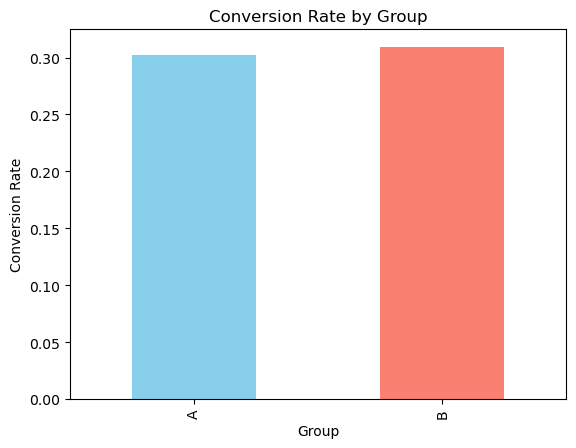

In [28]:
import matplotlib.pyplot as plt

# Bar plot of conversion rates by group
conversion_rate.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

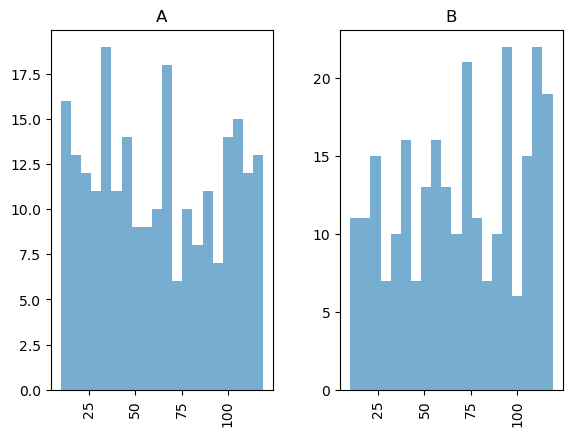

In [30]:
df['Time Spent (s)'].hist(by=df['Group'], bins=20, alpha=0.6)
plt.show()

In [31]:
from statsmodels.stats.proportion import proportions_ztest

# Number of conversions in Group A and Group B
conversions_A = df[df['Group'] == 'A']['Conversion'].sum()
conversions_B = df[df['Group'] == 'B']['Conversion'].sum()

# Number of total participants in Group A and Group B
n_A = df[df['Group'] == 'A'].shape[0]
n_B = df[df['Group'] == 'B'].shape[0]

# Perform the z-test
z_stat, p_value = proportions_ztest([conversions_A, conversions_B], [n_A, n_B])

# Output the result
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")


Z-statistic: -0.16089248753464097
P-value: 0.8721780792988162


In [32]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Group'], df['Conversion'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the result
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 0.004062174227476724
P-value: 0.9491810854842688
